In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

$$
\begin{equation}
\frac{dx}{dt}= a\sin{x}+b\cos{x}
\end{equation}$$

Text(0.5, 1.0, 'dxdt(t)')

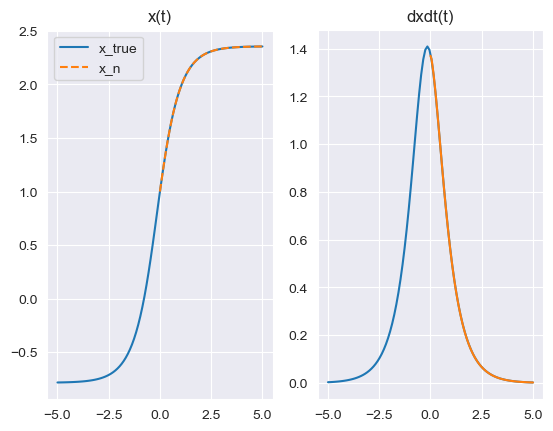

In [2]:
a=1
b=1
x0=1

# true solution
def true_solution(t):
    C1=np.arctan(b/a)
    C=np.log((1-np.cos(x0+C1))/(1+np.cos(x0+C1)))
    cos=2/(np.exp(2*np.linalg.norm([a,b])*t+C)+1)-1
    sol=np.arccos(cos)-C1
    return sol

t=np.linspace(-5,5,100)
dt=t[1]-t[0]
x_true=true_solution(t)


# numerical solution
def eq(x,t,a,b):
    dxdt=a*np.cos(x)+b*np.sin(x)
    return dxdt
t_n=np.linspace(0,5,100)  
dt_n=t_n[1]-t_n[0]
x_n=odeint(eq,x0,t_n,args=(a,b))[:,0]  


fig,axs=plt.subplots(1,2)

axs[0].plot(t,x_true,label='x_true')
axs[0].plot(t_n,x_n,linestyle='--',label='x_n')
axs[0].legend()
axs[0].set_title('x(t)')

axs[1].plot(t,np.gradient(x_true,dt),label='dxdt_true')
axs[1].plot(t_n,np.gradient(x_n,dt_n),label='dxdt_n')
axs[1].set_title('dxdt(t)')